
Здесь мы применим линейную регрессию на практике – попробуем предсказать стоимость машин и понять, 
от каких факторов зависит ценообразование на автомобили. 
Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные. 


In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import math
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


Читаем данные и смотрим их характеристики

In [2]:
df = pd.read_csv('/home/jupyter-k.bataeva-14/statistics/L7_ols/cars.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Мы хотим посмотреть марки автомобилей для каждой машины, так как эта переменная должна быть важной для анализа

In [6]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
#создаём отдельную колонку под марку машины
df['company'] = df.CarName.apply(lambda x: x.split()[0])
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


Проверяем названия марок

In [8]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Видно, что есть несколько ошибок в датасете, нужно исправлять ситуацию

In [9]:
df.company = df.company.apply(lambda x: x.replace('maxda','mazda'))
df.company = df.company.apply(lambda x: x.replace('Nissan','nissan'))
df.company = df.company.apply(lambda x: x.replace('porcshce','porsche'))
df.company = df.company.apply(lambda x: x.replace('toyouta','toyota'))
df.company = df.company.apply(lambda x: x.replace('vokswagen','volkswagen'))
df.company = df.company.apply(lambda x: x.replace('vw','volkswagen'))

In [10]:
df.company.unique() #проверяем, всё ли исправили

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
df.company.nunique() #смотрим, сколько марок осталось

22

Далее проводим регрессионный анализ. дф мы оставим только те колонки, которые считаем значимыми для модели

In [12]:
df_2= df.copy()

In [13]:
df_2 =df.drop(['symboling','stroke','compressionratio','peakrpm', 'citympg', 'highwaympg', 'car_ID', 'CarName', 'doornumber', 'fuelsystem', 'enginelocation','carheight' ], axis =1)

In [14]:
#смотрим корреляции в дф
df_2.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


In [15]:
df_2.nunique()

fueltype            2
aspiration          2
carbody             5
drivewheel          3
wheelbase          53
carlength          75
carwidth           44
curbweight        171
enginetype          7
cylindernumber      7
enginesize         44
boreratio          38
horsepower         59
price             189
company            22
dtype: int64

У нас есть номинативные переменные. Их нужно перевести в другой формат, чтобы учесть в анализе

In [16]:
df_dummy = pd.get_dummies(data=df_2[['fueltype','aspiration','carbody','drivewheel','enginetype', 'cylindernumber', 'company' ]], drop_first = True)
df_dummy

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#соединяем дф с категорильными переменными и дф с количественными переменными
df_dummy = pd.concat([df_dummy, df_2], axis=1)
df_dummy

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,company
0,1,0,0,0,0,0,0,1,0,0,...,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,alfa-romero
1,1,0,0,0,0,0,0,1,0,0,...,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,alfa-romero
2,1,0,0,1,0,0,0,1,0,0,...,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,alfa-romero
3,1,0,0,0,1,0,1,0,0,0,...,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,audi
4,1,0,0,0,1,0,0,0,0,0,...,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0,volvo
201,1,1,0,0,1,0,0,1,0,0,...,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0,volvo
202,1,0,0,0,1,0,0,1,0,0,...,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0,volvo
203,0,1,0,0,1,0,0,1,0,0,...,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0,volvo


In [18]:
#так как мы раздамили эти колонки, убираем их
df_final = df_dummy.drop(['fueltype','aspiration','carbody','drivewheel','enginetype', 'cylindernumber', 'company' ], axis =1)
df_final

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,company_volkswagen,company_volvo,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,1,0,0,0,0,0,0,1,0,0,...,0,0,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,99.4,176.6,66.4,2824,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,1,109.1,188.8,68.9,2952,141,3.78,114,16845.0
201,1,1,0,0,1,0,0,1,0,0,...,0,1,109.1,188.8,68.8,3049,141,3.78,160,19045.0
202,1,0,0,0,1,0,0,1,0,0,...,0,1,109.1,188.8,68.9,3012,173,3.58,134,21485.0
203,0,1,0,0,1,0,0,1,0,0,...,0,1,109.1,188.8,68.9,3217,145,3.01,106,22470.0


Для начала построим модель с всего одним предиктором - horsepower

Смотрим на сами их рапсределения:

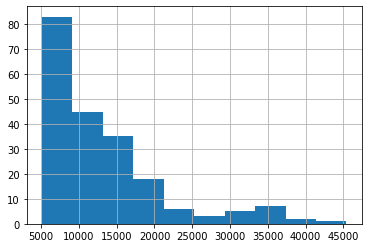

In [19]:
df_final.price.hist()

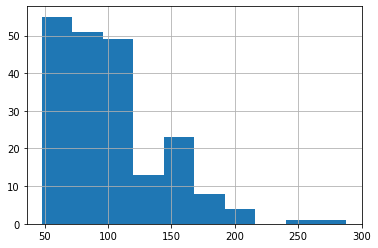

In [20]:
df_final.horsepower.hist()

In [21]:
results= smf.ols('price ~ horsepower', df_final).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           1.48e-48
Time:                        22:21:43   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

 Модель покрывает 65% дисперсии ЗП, p< 0.001.

Далее построим несколько больших моделей и сравним их между собой

In [22]:
# модель со всеми предикторами
X= df_final[['fueltype_gas','aspiration_turbo','carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar',
       'company_mazda', 'company_mercury', 'company_mitsubishi',
       'company_nissan', 'company_peugeot', 'company_plymouth',
       'company_porsche', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'horsepower' ]]
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model1 = sm.OLS(df_final.price, X)  # говорим модели, что у нас ЗП, а что НП
results1 = model1.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           1.48e-48
Time:                        22:21:43   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

 Вывод по модели:
Модель покрывает 95% дисперсии ЗП, p< 0.001. 0<Критерий Дарбина-Уотсона< 4. Тест Омнибус p<0.001, что говорит о значимости влияния НП. Тест Харке-Бера p<0.001 - остатки не нормальны. Condno > 2 - мультиколлинеарность присутствует.

Так как беспокоит только тест Харке-Бера, проверим распределение квадратов.

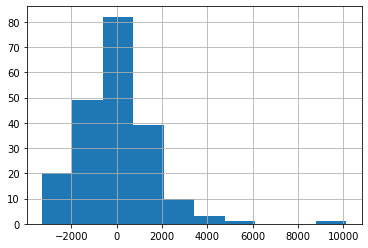

In [23]:
results1.resid.hist()

Остатки нормальны, модель вполне себе убедительна.

#### Окончательный вывод по модели 1:

Модель покрывает 90% дисперсии ЗП, p< 0.001. 0<Критерий Дарбина-Уотсона< 4. Тест Омнибус p<0.001, что говорит о значимости влияния НП. Остатки нормальны. Condno > 2 - мультиколлинеарность присутствует.

In [24]:
# модель со всеми предикторами, кроме марок машин
X= df_final[['fueltype_gas','aspiration_turbo','carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
        'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'horsepower' ]]
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model2 = sm.OLS(df_final.price, X)  # говорим модели, что у нас ЗП, а что НП
results2 = model2.fit()  # строим регрессионную прямую
print(results2.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           9.86e-81
Time:                        22:21:43   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

Модель покрывает 90% дисперсии ЗП, p< 0.001. 0<Критерий Дарбина-Уотсона< 4. Тест Омнибус p<0.001, что говорит о значимости влияния НП. Тест Харке-Бера p<0.001 - остатки не нормальны. Condno > 2 - мультиколлинеарность присутствует.

Так как беспокоит только тест Харке-Бера, проверим распределение квадратов.

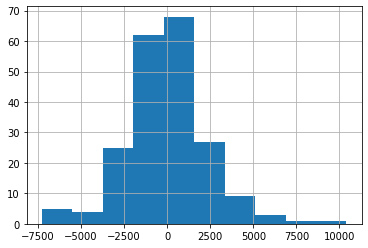

In [25]:
results2.resid.hist()

Остатки нормально распределены.

#### Окончательный вывод по модели 2:

Модель покрывает 90% дисперсии ЗП, p< 0.001. 0<Критерий Дарбина-Уотсона< 4. Тест Омнибус p<0.001, что говорит о значимости влияния НП. Остатки нормальны. Condno > 2 - мультиколлинеарность присутствует.

В обеих моделях выше достаточно количество НП не значимы статистически. Уберём их и посмотрим, что будет с моделью.

In [27]:
# модель со всеми стат значимыми предикторами
X= df_final[['fueltype_gas','carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
        'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
        
        'carwidth', 
       'horsepower' ]]
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model3 = sm.OLS(df_final.price, X)  # говорим модели, что у нас ЗП, а что НП
results3 = model3.fit()  # строим регрессионную прямую
print(results3.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     93.84
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           7.47e-82
Time:                        22:30:07   Log-Likelihood:                -1901.4
No. Observations:                 205   AIC:                             3839.
Df Residuals:                     187   BIC:                             3899.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.397e+

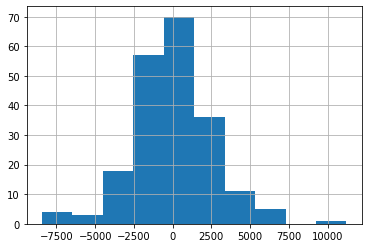

In [28]:
results3.resid.hist()

#### Окончательный вывод по модели 3:

Модель покрывает 89% дисперсии ЗП, p< 0.001. 0<Критерий Дарбина-Уотсона< 4. Тест Омнибус p<0.001, что говорит о значимости влияния НП. Остатки нормальны. Condno > 2 - мультиколлинеарность присутствует.


## Вывод - 
выбираем последнюю модель, так как она объясняет 89% дисперсии зависимой переменной и в ней
намного меньше незначимых предикторов
Пример интерпретации: при единичном изменении показателя horsepower, цена 
ВОЗРАСТАЕТ на  86.8164

